In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 2, 10

In [4]:
%matplotlib inline

In [5]:
class BayesEstimator:
    def __init__(self, N=100, p_change = 0):
        self.L = N + 1
        self.H = np.ones(self.L) / self.L
        self.N = N
        self.p_change = p_change
                

    def p_observation(self, o):
        P_down = 0
        for p in range(self.L):
            P_down += p/self.N * self.H[p]
        if o: return 1-P_down
        else: return P_down
            
    def update(self, o):
        H = self.H
        G = H.copy()
        N = self.N
        L = self.L
        g = self.p_change

        for p in range(L):
            P_obs = (1-p/N) if o else p/N
            hp = 0
            for q in range(L):
                P_trans = 1-g if (p == q) else g/N
                hp += P_obs * P_trans * G[q]
            H[p] = hp

        # re-normalize
        self.H = H / H.sum()
        
        
    def plot(self, ax=None):
        if not ax:
            fig = plt.figure(figsize=(10, 2))
            ax = fig.add_subplot(1,1,1)
        ax.bar(np.arange(self.L), height=self.H)
        ax.set_xlim(0,self.L)



In [6]:
b = BayesEstimator(10, 0.01)

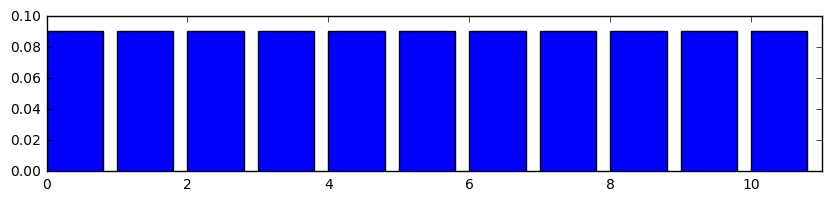

In [7]:
b.plot()

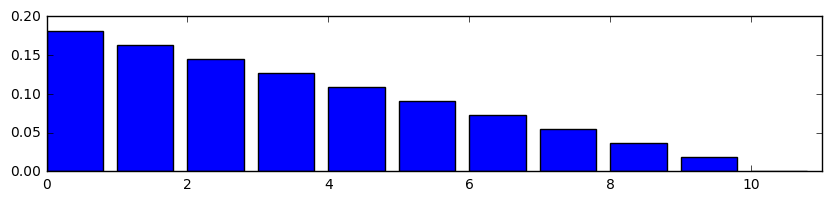

In [8]:
b.update(True); b.plot()

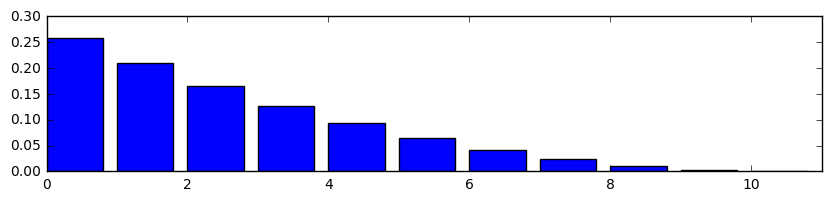

In [9]:
b.update(True); b.plot()

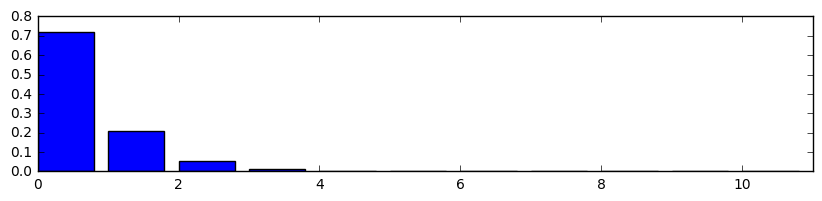

In [10]:
for x in range(10): b.update(True)
b.plot()

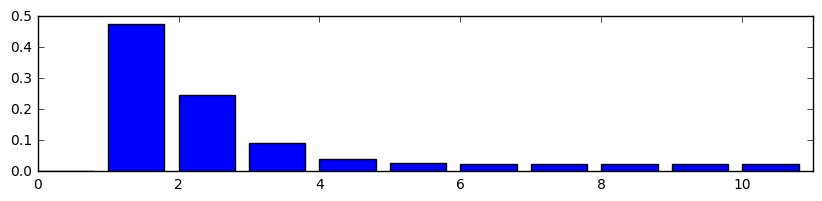

In [11]:
b.update(False); b.plot()

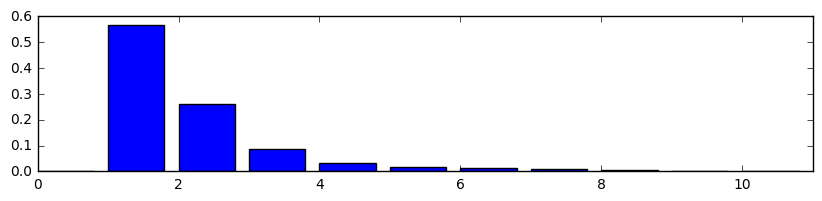

In [12]:
b.update(True); b.plot()

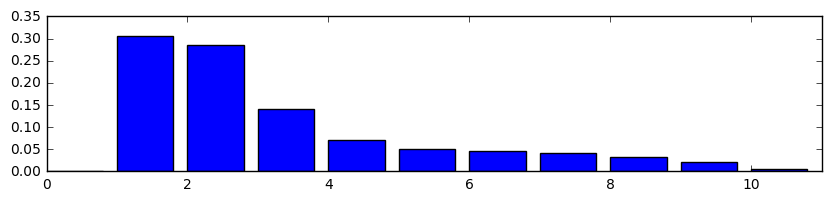

In [13]:
b.update(False); b.plot()


0.5


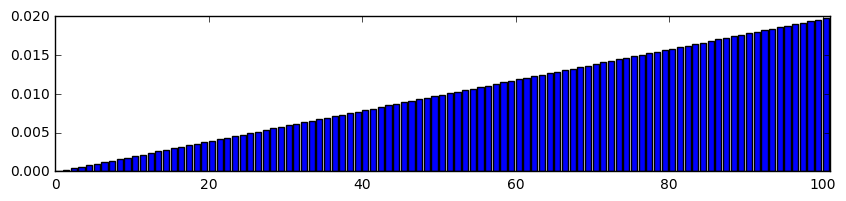


0.67


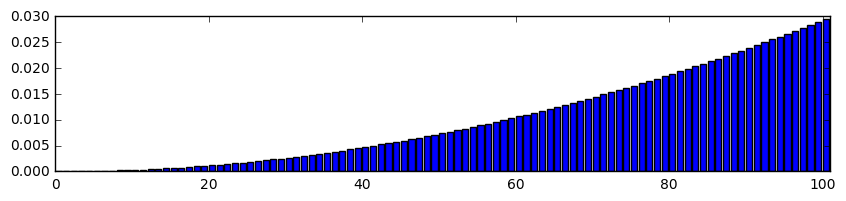


0.753668216168


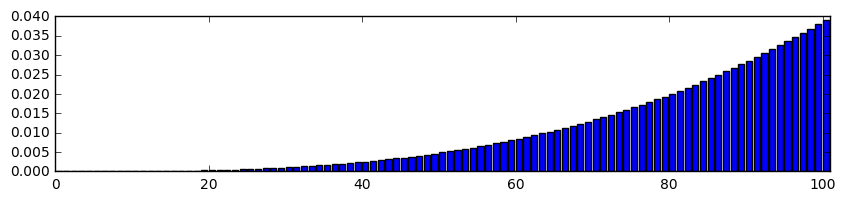

a
0.196149986021


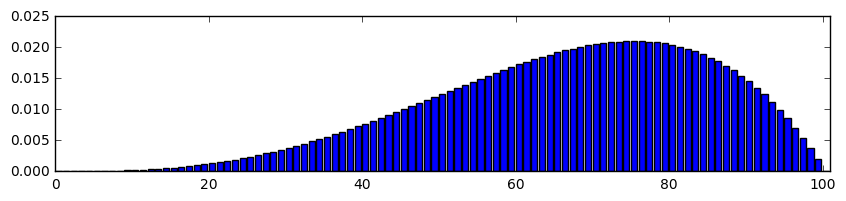

a
0.334497468777


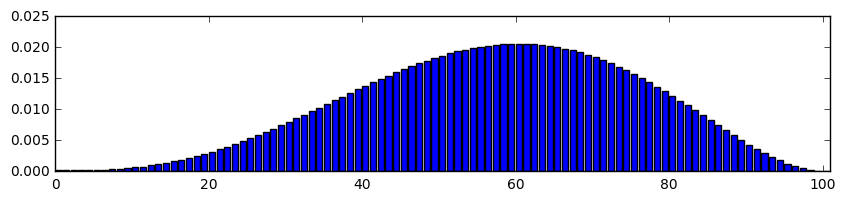

a
0.430966671311


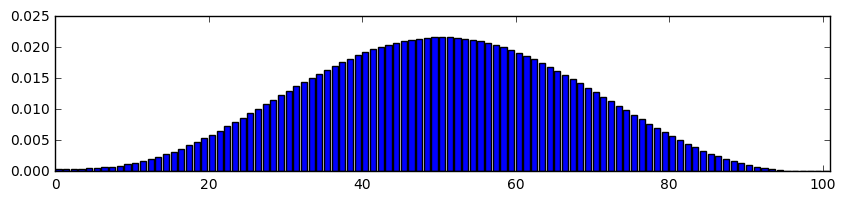

a
0.50399545086


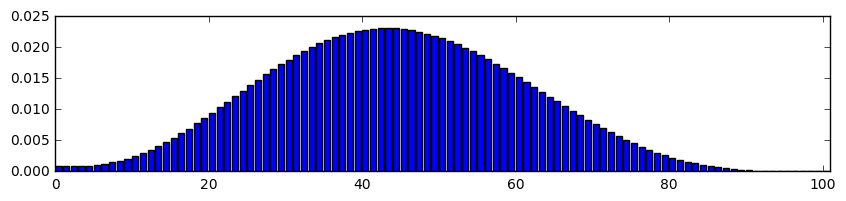

a
0.561463521821


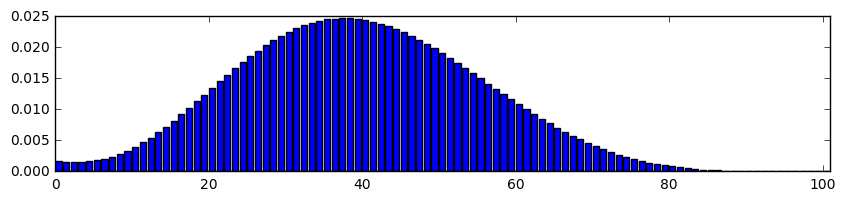

a
0.608121532463


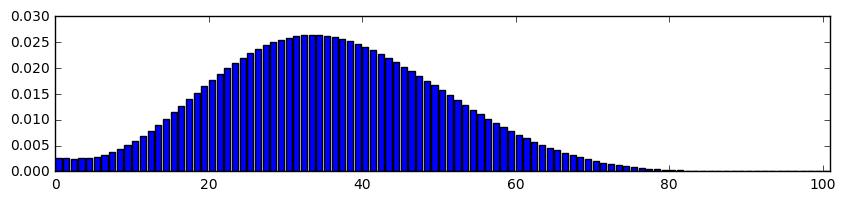

a
0.646979127763


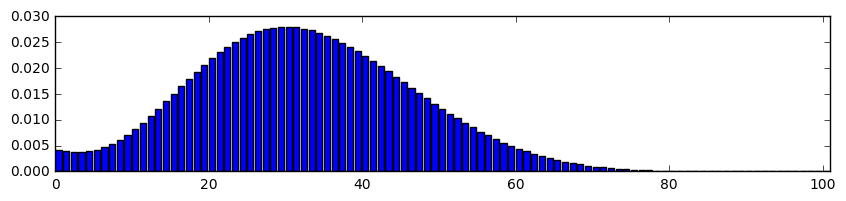

a
0.680027220622


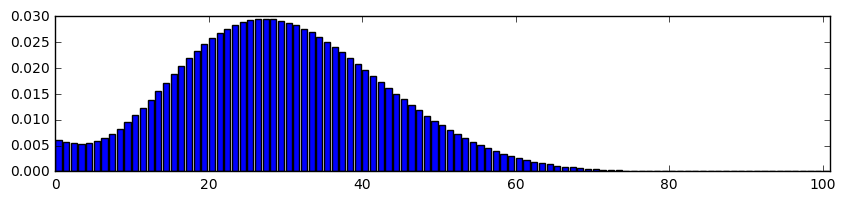


0.291372549465


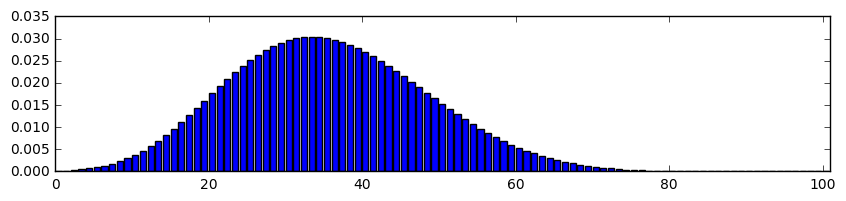

a
0.646903698188


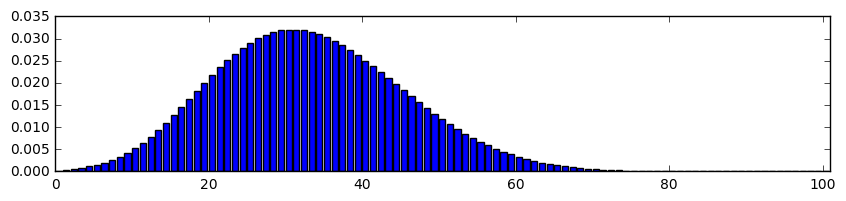

a
0.67211912398


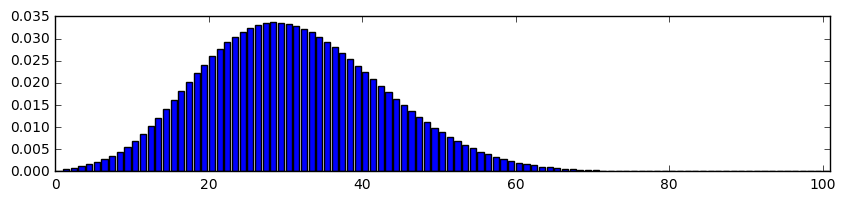

a
0.694076034419


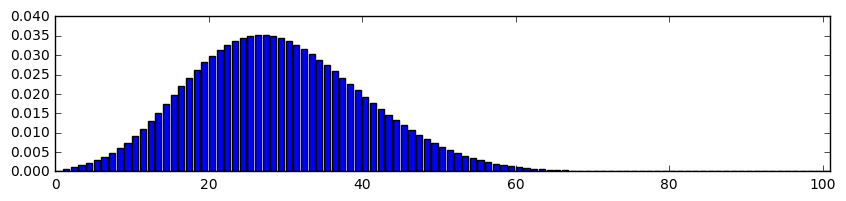

a
0.713571960223


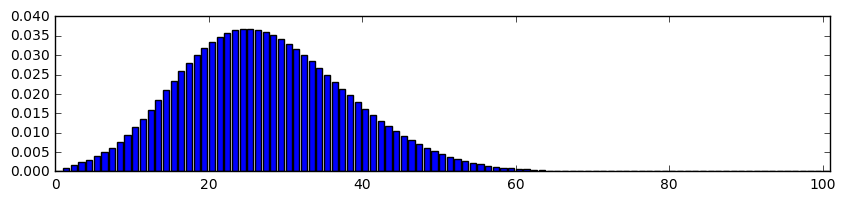


0.268945440737


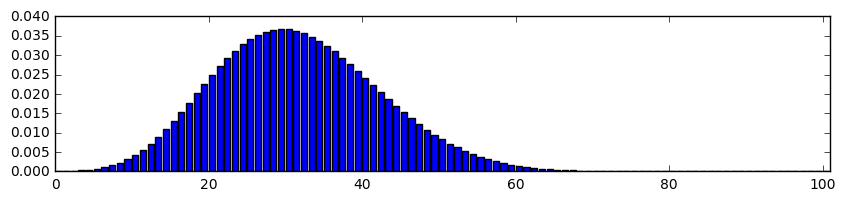

a
0.687294986113


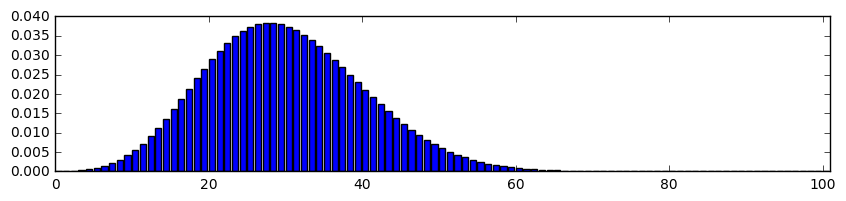

a
0.704249723643


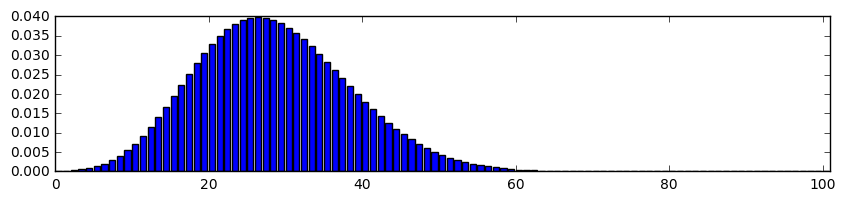

a
0.719287370066


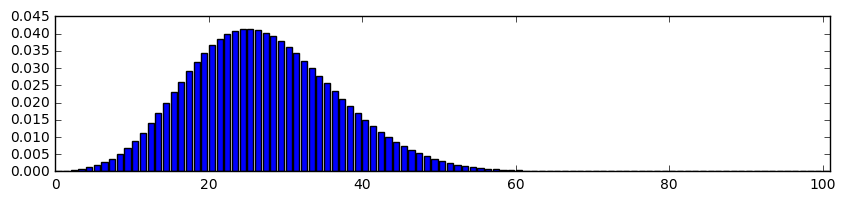


0.267035655291


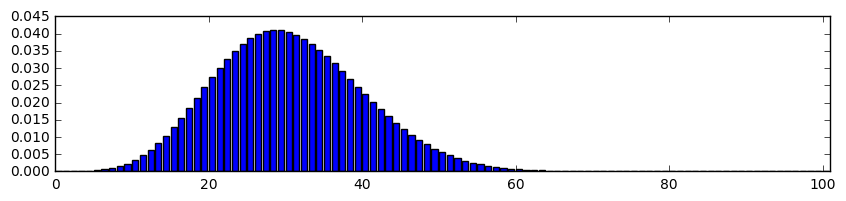

a
0.697697788233


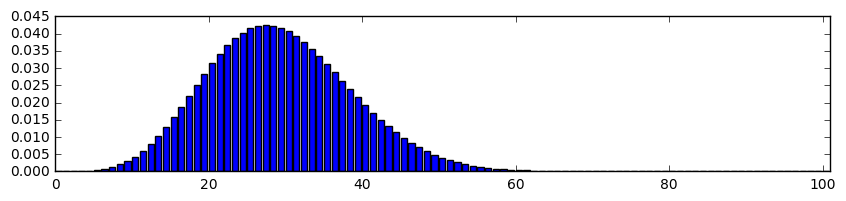

In [ ]:
b = BayesEstimator(100, 0.001)
while True:
    a = input()
    o = a != ""
    print(b.p_observation(o))
    b.update(o)
    b.plot()
    plt.show()